# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)


## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", 'nannan']

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [01:50<00:00, 990.20it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves'

In [18]:
#Store the preprocessed essays back in project_data so that splitting into train, cv and test can be done on this
#This is done here as we need to create vectorizer object with only train data. So the splitting should be done before vectorizer
#Preprocessed essays also need to be split

project_data['essay']=preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

In [20]:
# printing some random titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[200])
print("="*50)
print(project_data['project_title'].values[1500])
print("="*50)
print(project_data['project_title'].values[21000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
Sensory toys to make sense of our world
Listening Center
Chromebooks for Stellar Students!
Inspiring Minds by Enhancing the Educational Experience


In [21]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 19583.02it/s]


In [22]:
#After preprocessing project titles
preprocessed_titles[21000]

'chromebooks stellar students'

In [23]:
#Store the preprocessed essays back in project_data so that splitting into train, cv and test can be done on this
project_data['project_title']=preprocessed_titles

### Preprocessing project grade category

In [24]:
project_grade = list(project_data['project_grade_category'].values)

grade_list = []
for i in project_grade:
    i = i.replace(' ','_')
    i = i.replace('-','_')
    grade_list.append(i)


project_data['clean_grade_category'] = grade_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)


## 1.5 Preparing data for models

In [25]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'clean_grade_category'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.6.1 Splitting Data into Train, CV and Test

In [26]:
# Merging project and resources datasets so that while splitting everything can be split together
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

#splitting class variable and other features in data
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   

                               project_title  \
0  educational support english learners home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                             0  Literacy_Language   

  clean_subcategories                                              essay  \
0        ESL Literacy  students english learners working english seco...   

  clean_grade_category  price  quantity  
0        Grades_PreK_2  154.6        23

In [27]:
#Splitting data into train, cv and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [28]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print("*"*20)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)
print('*'*20)
print(project_data.shape)

(49041, 19)
(24155, 19)
(36052, 19)
********************
(49041,)
(24155,)
(36052,)
********************
(109248, 20)


In [29]:
X_test.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
26184        33737  p225681  d44f8cb33de45fce2126bb699d302808           Mrs.   
104673      119351  p014041  7fecb97b9441ccc86f7cd1ea594387f8           Mrs.   
78525        89649  p234695  c74a5037ffd5d1a5bced7c72d93d4abd            Mr.   
9179         23230  p253514  b33f310cadc0482670f09cffe7a0bf9a           Mrs.   
80025       134690  p186778  9e945beadf295399ba8a333e20e3818c            Ms.   

       school_state project_submitted_datetime  \
26184            TN        2016-12-26 14:31:27   
104673           NC        2017-01-30 20:45:58   
78525            IL        2016-11-17 13:59:37   
9179             GA        2017-04-25 15:44:40   
80025            LA        2016-09-01 07:46:46   

                               project_title  \
26184                           ready 2 read   
104673                        whoo listening   
78525                           fight rights   
9179    equipping world changers right tools   
80025   chromebooks help us keep digital age   

                                          project_essay_1  \
26184   I am truly blessed to have the opportunity to ...   
104673  The students in my class are your average thir...   
78525   I teach in a neighborhood school for CPS. For ...   
9179    My students are representative of a typical ru...   
80025   Our school is a low socioeconomic school where...   

                                          project_essay_2 project_essay_3  \
26184   My classroom consists of students on all learn...             NaN   
104673  My students need headphones in order to elimin...             NaN   
78525   My students are juniors in high school.  Their...             NaN   
9179    The materials and supplies I'm requesting will...             NaN   
80025   In our fourth grade science and social studies...             NaN   

       project_essay_4                           project_resource_summary  \
26184              NaN  My students need a variety of literacy games t...   
104673             NaN  My students need headphones in order to elimin...   
78525              NaN  My students need high interest books that are ...   
9179               NaN  My students need florescent light covers so th...   
80025              NaN  My students need 2 Chromebooks and 2 sets of h...   

        teacher_number_of_previously_posted_projects  \
26184                                              1   
104673                                           125   
78525                                              3   
9179                                               3   
80025                                              4   

                      clean_categories                  clean_subcategories  \
26184                Literacy_Language                             Literacy   
104673  Literacy_Language Math_Science       Literature_Writing Mathematics   
78525      History_Civics SpecialNeeds       Civics_Government SpecialNeeds   
9179                 Literacy_Language                   Literature_Writing   
80025      Math_Science History_Civics  EnvironmentalScience SocialSciences   

                                                    essay  \
26184   truly blessed opportunity work sweet group kin...   
104673  students class average third grade students co...   
78525   teach neighborhood school cps many students tr...   
9179    students representative typical rural communit...   
80025   school low socioeconomic school students quali...   

       clean_grade_category   price  quantity  
26184         Grades_PreK_2  232.49         6  
104673           Grades_3_5   74.99         2  
78525           Grades_9_12   13.46        25  
9179             Grades_6_8   43.96        27  
80025            Grades_3_5  206.86         4

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [30]:
# For categories, when one hot encoding is done the number of features will increase to 9. But as there can be multiple 
#categories for a single project, the number of dictinct values for this categorical feature will be high. So continuing with
#one hot encoding itself

In [31]:
# we use count vectorizer to convert the values into one

#Below code is to create a dict of categories from clean_categories to be given to create vocabulary for vectorizer
#dictionary of vocabulary will be created only with train data

from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

#Vectorizing project subject categories
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

#vectorizer fit is done only using train data
vectorizer.fit(X_train['clean_categories'].values)

#Same vectorizer object is used to transform all train, cv and test datasets
train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_categories_one_hot.shape)
print("Shape of cv matrix after one hot encoding ",cv_categories_one_hot.shape)
print("Shape of test matrix after one hot encoding ",test_categories_one_hot.shape)

#Taking list of features for categories so that it can be used to display features in DT
category_features = vectorizer.get_feature_names()

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig  (49041, 9)
Shape of cv matrix after one hot encoding  (24155, 9)
Shape of test matrix after one hot encoding  (36052, 9)


In [32]:
# we use count vectorizer to convert the values into one 
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

#Below code is to create a dict of categories from clean_subcategories to be given to create vocabulary for vectorizer
#dictionary of vocabulary will be created only with train data

my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

#Vectorizing project sub categories
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

#Vectorize fit is done only using train data
vectorizer.fit(X_train['clean_subcategories'].values)

#Same vectorizer object is used to transform all train, cv and test datasets
train_sub_categories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
cv_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_sub_categories_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",cv_sub_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_sub_categories_one_hot.shape)

#Taking list of features for subcategory
subcategory_features = vectorizer.get_feature_names()

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig  (49041, 30)
Shape of cv matrix after one hot encodig  (24155, 30)
Shape of test matrix after one hot encodig  (36052, 30)


In [33]:
# For state code as there are 51 distinct values it is better to convert the categorical feature into numerical feature.
# To convert into numerical feature, get the conditional probability of y=1 given each distinct state code

In [34]:
# Feature encoding for school state
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

my_counter = Counter()
for word in X_train['school_state'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

# Count each state code when y=1
my_counter2 = Counter()
i=0
for word in X_train['school_state'].values:
    if y_train[i]:
        my_counter2.update(word.split())
    i+=1
    
state_dict_2 = dict(my_counter2)
sorted_state_dict_2 = dict(sorted(state_dict_2.items(), key=lambda kv: kv[1]))

#code to get probability of y=1 given each state code
prob_state = []
for i in sorted_state_dict.keys():
    prob_state.append(round((sorted_state_dict_2[i]/sorted_state_dict[i]),3))
    
#Creating dict of probabilities
prob_state_dict = dict(zip(sorted_state_dict.keys(),prob_state))


In [35]:
#Creating new feature for train dataset for probabilities
school_state_prob = []
for i in X_train['school_state'].values:
    school_state_prob.append(prob_state_dict[i])
X_train['state_code_prob'] = school_state_prob

#Verifying the results
print(X_train['school_state'].iloc[1210])
print(school_state_prob[1210])
print(prob_state_dict[X_train['school_state'].iloc[1210]])

AZ
0.842
0.842


In [36]:
#Creating new feature for cv dataseet for probabilities
school_state_prob = []
for i in X_cv['school_state'].values:
    school_state_prob.append(prob_state_dict[i])
X_cv['state_code_prob'] = school_state_prob

#Creating new feature for test dataseet for probabilities
school_state_prob = []
for i in X_test['school_state'].values:
    school_state_prob.append(prob_state_dict[i])
X_test['state_code_prob'] = school_state_prob

In [37]:
#Checking for NaN entries in techer_prefix column
project_data[project_data['teacher_prefix'].isnull()]['teacher_prefix'].apply(np.size)

7820     1
30368    1
57654    1
Name: teacher_prefix, dtype: int64

In [38]:
# Feature encoding for teacher_prefix

# To deal with nan values in teacher_prefix
X_train['teacher_prefix']=X_train['teacher_prefix'].replace(np.nan,'Mrs.')
X_test['teacher_prefix']=X_test['teacher_prefix'].replace(np.nan,'Mrs.')
X_cv['teacher_prefix']=X_cv['teacher_prefix'].replace(np.nan,'Mrs.')

vectorizer = CountVectorizer(vocabulary=list(X_train['teacher_prefix'].unique()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values)
print(vectorizer.get_feature_names())

train_teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values)
cv_teacher_prefix_one_hot = vectorizer.transform(X_cv['teacher_prefix'].values)
test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values)

print("Shape of train matrix after one hot encodig ",train_teacher_prefix_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",cv_teacher_prefix_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_teacher_prefix_one_hot.shape)

teacher_prefix_features = vectorizer.get_feature_names()

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']
Shape of train matrix after one hot encodig  (49041, 5)
Shape of cv matrix after one hot encodig  (24155, 5)
Shape of test matrix after one hot encodig  (36052, 5)


In [39]:
# Feature encoding for project_grade_category

vectorizer = CountVectorizer(vocabulary=list(X_train['clean_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_grade_category'].values)
print(vectorizer.get_feature_names())

train_grade_category_one_hot = vectorizer.transform(X_train['clean_grade_category'].values)
cv_grade_category_one_hot = vectorizer.transform(X_cv['clean_grade_category'].values)
test_grade_category_one_hot = vectorizer.transform(X_test['clean_grade_category'].values)

print("Shape of train matrix after one hot encodig ",train_grade_category_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",cv_grade_category_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_grade_category_one_hot.shape)

grade_features = vectorizer.get_feature_names()

['Grades_9_12', 'Grades_PreK_2', 'Grades_6_8', 'Grades_3_5']
Shape of train matrix after one hot encodig  (49041, 4)
Shape of cv matrix after one hot encodig  (24155, 4)
Shape of test matrix after one hot encodig  (36052, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [40]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train['essay'])
train_text_bow = vectorizer.transform(X_train['essay'].values)
cv_text_bow = vectorizer.transform(X_cv['essay'].values)
test_text_bow = vectorizer.transform(X_test['essay'].values)

print("Shape of train matrix after one hot encodig ",train_text_bow.shape)
print("Shape of cv matrix after one hot encodig ",cv_text_bow.shape)
print("Shape of test matrix after one hot encodig ",test_text_bow.shape)

text_bow_features = vectorizer.get_feature_names()

Shape of train matrix after one hot encodig  (49041, 5000)
Shape of cv matrix after one hot encodig  (24155, 5000)
Shape of test matrix after one hot encodig  (36052, 5000)


In [41]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [42]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'])

train_title_bow = vectorizer.transform(X_train['project_title'].values)
cv_title_bow = vectorizer.transform(X_cv['project_title'].values)
test_title_bow = vectorizer.transform(X_test['project_title'].values)

print("Shape of train matrix after one hot encodig ",train_title_bow.shape)
print("Shape of cv matrix after one hot encodig ",cv_title_bow.shape)
print("Shape of test matrix after one hot encodig ",test_title_bow.shape)

title_bow_features = vectorizer.get_feature_names()

Shape of train matrix after one hot encodig  (49041, 1977)
Shape of cv matrix after one hot encodig  (24155, 1977)
Shape of test matrix after one hot encodig  (36052, 1977)


#### 1.5.2.2 TFIDF vectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train['essay'])

train_text_tfidf = vectorizer.transform(X_train['essay'].values)
cv_text_tfidf = vectorizer.transform(X_cv['essay'].values)
test_text_tfidf = vectorizer.transform(X_test['essay'].values)

print("Shape of train matrix after one hot encodig ",train_text_tfidf.shape)
print("Shape of cv matrix after one hot encodig ",cv_text_tfidf.shape)
print("Shape of test matrix after one hot encodig ",test_text_tfidf.shape)

text_tfidf_features = vectorizer.get_feature_names()

Shape of train matrix after one hot encodig  (49041, 5000)
Shape of cv matrix after one hot encodig  (24155, 5000)
Shape of test matrix after one hot encodig  (36052, 5000)


In [44]:
# TFIDF for project title
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'])

train_title_tfidf = vectorizer.transform(X_train['project_title'].values)
cv_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print("Shape of train matrix after one hot encodig ",train_title_tfidf.shape)
print("Shape of cv matrix after one hot encodig ",cv_title_tfidf.shape)
print("Shape of test matrix after one hot encodig ",test_title_tfidf.shape)

title_tfidf_features = vectorizer.get_feature_names()

Shape of train matrix after one hot encodig  (49041, 1977)
Shape of cv matrix after one hot encodig  (24155, 1977)
Shape of test matrix after one hot encodig  (36052, 1977)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [45]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
'''
# ============================


#Creating word 2 vec only using data from train dataset

words = []
for i in X_train['essay']:
    words.extend(i.split(' '))

for i in X_train['project_title']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

Loading Glove Model


1917495it [07:08, 4475.23it/s]


Done. 1917495  words loaded!
all the words in the coupus 6912421
the unique words in the coupus 42566
The number of words that are present in both glove vectors and our coupus 38864 ( 91.303 %)
word 2 vec length 38864


In [46]:
# storing variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [47]:
# average Word2Vec
# compute average word2vec for each review in train data.

train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

print(len(train_avg_w2v_vectors))
print(len(train_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:25<00:00, 1953.55it/s]


49041
300


In [48]:
# average Word2Vec
# compute average word2vec for each review in cross validation data.

cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors.append(vector)

print(len(cv_avg_w2v_vectors))
print(len(cv_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:12<00:00, 1984.37it/s]


24155
300


In [49]:
# average Word2Vec
# compute average word2vec for each review in test data.

test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

print(len(test_avg_w2v_vectors))
print(len(test_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:18<00:00, 1960.90it/s]


36052
300


### Avg w2v on project title

In [50]:
# average Word2Vec
# compute average word2vec for each project title in train data.

train_title_avg_w2v_vectors = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_train['project_title']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_title_avg_w2v_vectors.append(vector)

print(len(train_title_avg_w2v_vectors))
print(len(train_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 42265.76it/s]


49041
300


In [51]:
# average Word2Vec
# compute average word2vec for each project title in cross validation data.

cv_title_avg_w2v_vectors = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_title_avg_w2v_vectors.append(vector)

print(len(cv_title_avg_w2v_vectors))
print(len(cv_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 44916.69it/s]


24155
300


In [52]:
# average Word2Vec
# compute average word2vec for each project title in test data.

test_title_avg_w2v_vectors = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_test['project_title']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_title_avg_w2v_vectors.append(vector)

print(len(test_title_avg_w2v_vectors))
print(len(test_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 46327.43it/s]


36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [53]:
#Model is created nly using train data
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [54]:
# TFIDF weighted Word2Vec
# compute tfidf weighted word2vec for each review in train dataset.

train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors.append(vector)

print(len(train_tfidf_w2v_vectors))
print(len(train_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [02:56<00:00, 277.85it/s]


49041
300


In [55]:
# TFIDF weighted Word2Vec
# compute tfidf weighted word2vec for each review in cross validation dataset.

cv_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_vectors.append(vector)

print(len(cv_tfidf_w2v_vectors))
print(len(cv_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [01:27<00:00, 277.32it/s]


24155
300


In [56]:
# TFIDF weighted Word2Vec
# compute tfidf weighted word2vec for each review in test dataset.

test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors.append(vector)

print(len(test_tfidf_w2v_vectors))
print(len(test_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:23<00:00, 431.54it/s]


36052
300


In [57]:
# Similarly you can vectorize for title also

In [58]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [59]:
# tfidf weighted Word2Vec
# compute tfidf word2vec for each title in train dataset.

train_title_tfidf_w2v_vectors = []; # the tfidf-w2v for each title is stored in this list
for sentence in tqdm(X_train['project_title']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_title_tfidf_w2v_vectors.append(vector)

print(len(train_title_tfidf_w2v_vectors))
print(len(train_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 39336.25it/s]


49041
300


In [60]:
# tfidf weighted Word2Vec
# compute tfidf word2vec for each title in cross validation dataset.

cv_title_tfidf_w2v_vectors = []; # the tfidf-w2v for each title is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_title_tfidf_w2v_vectors.append(vector)

print(len(cv_title_tfidf_w2v_vectors))
print(len(cv_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 38813.43it/s]


24155
300


In [61]:
# tfidf weighted Word2Vec
# compute tfidf word2vec for each title in test dataset.

test_title_tfidf_w2v_vectors = []; # the tfidf-w2v for each title is stored in this list
for sentence in tqdm(X_test['project_title']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_title_tfidf_w2v_vectors.append(vector)

print(len(test_title_tfidf_w2v_vectors))
print(len(test_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 45268.14it/s]


36052
300


### 1.5.3 Vectorizing Numerical features

In [62]:
# For Decision Tree classifier there is no need of standardizing the numerical features. So leaving number of previous projects
# and price as it is without standardizing

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [63]:
#Converting list to numpy array
#https://stackoverflow.com/questions/27516849/how-to-convert-list-of-numpy-arrays-into-single-numpy-array

train_avg_w2v_vectors=np.vstack(train_avg_w2v_vectors)
cv_avg_w2v_vectors=np.vstack(cv_avg_w2v_vectors)
test_avg_w2v_vectors=np.vstack(test_avg_w2v_vectors)

train_tfidf_w2v_vectors=np.vstack(train_tfidf_w2v_vectors)
cv_tfidf_w2v_vectors=np.vstack(cv_tfidf_w2v_vectors)
test_tfidf_w2v_vectors=np.vstack(test_tfidf_w2v_vectors)

train_title_avg_w2v_vectors=np.vstack(train_title_avg_w2v_vectors)
cv_title_avg_w2v_vectors=np.vstack(cv_title_avg_w2v_vectors)
test_title_avg_w2v_vectors=np.vstack(test_title_avg_w2v_vectors)

train_title_tfidf_w2v_vectors=np.vstack(train_title_tfidf_w2v_vectors)
cv_title_tfidf_w2v_vectors=np.vstack(cv_title_tfidf_w2v_vectors)
test_title_tfidf_w2v_vectors=np.vstack(test_title_tfidf_w2v_vectors)

In [64]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack,coo_matrix
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

X_train_encoded = hstack((train_categories_one_hot,train_sub_categories_one_hot,np.array(X_train['state_code_prob']).reshape(-1, 1),train_teacher_prefix_one_hot,train_grade_category_one_hot,train_text_bow,train_text_tfidf,train_avg_w2v_vectors,train_tfidf_w2v_vectors,train_title_bow,train_title_tfidf,train_title_avg_w2v_vectors,train_title_tfidf_w2v_vectors,np.array(X_train['price']).reshape(-1, 1),np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_cv_encoded = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,np.array(X_cv['state_code_prob']).reshape(-1, 1),cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_text_bow,cv_text_tfidf,cv_avg_w2v_vectors,cv_tfidf_w2v_vectors,cv_title_bow,cv_title_tfidf,cv_title_avg_w2v_vectors,cv_title_tfidf_w2v_vectors,np.array(X_cv['price']).reshape(-1, 1),np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_test_encoded = hstack((test_categories_one_hot,test_sub_categories_one_hot,np.array(X_test['state_code_prob']).reshape(-1, 1),test_teacher_prefix_one_hot,test_grade_category_one_hot,test_text_bow,test_text_tfidf,test_avg_w2v_vectors,test_tfidf_w2v_vectors,test_title_bow,test_title_tfidf,test_title_avg_w2v_vectors,test_title_tfidf_w2v_vectors,np.array(X_test['price']).reshape(-1, 1),np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

print(X_train_encoded.shape)
print(X_cv_encoded.shape)
print(X_test_encoded.shape)


(49041, 15205)
(24155, 15205)
(36052, 15205)


<h1>2. Decision Tree </h1>

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [2]:
# importing all the required packages
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [ ]:
#Creating datasets with categorical and numerical features and project title and essay in BoW encoding

X_train_encoded_bow = hstack((train_categories_one_hot,train_sub_categories_one_hot,np.array(X_train['state_code_prob']).reshape(-1, 1),train_teacher_prefix_one_hot,train_grade_category_one_hot,train_text_bow,train_title_bow,np.array(X_train['price']).reshape(-1, 1),np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_cv_encoded_bow = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,np.array(X_cv['state_code_prob']).reshape(-1, 1),cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_text_bow,cv_title_bow,np.array(X_cv['price']).reshape(-1, 1),np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_test_encoded_bow = hstack((test_categories_one_hot,test_sub_categories_one_hot,np.array(X_test['state_code_prob']).reshape(-1, 1),test_teacher_prefix_one_hot,test_grade_category_one_hot,test_text_bow,test_title_bow,np.array(X_test['price']).reshape(-1, 1),np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

print(X_train_encoded_bow.shape)
print(X_cv_encoded_bow.shape)
print(X_test_encoded_bow.shape)

In [72]:
#Creaing set of all fetaure names 
features_bow = category_features+subcategory_features
features_bow.append('state_code_prob')
features_bow = features_bow+teacher_prefix_features+grade_features+text_bow_features+title_bow_features
features_bow.append('price')
features_bow.append('teacher_number_of_previously_posted_projects')

### Hyperparameter tuning using GridSearchCV

In [73]:
DTclf = DecisionTreeClassifier(class_weight='balanced')  
parameters = {'max_depth':(1, 5, 10, 50, 100, 500, 100),'min_samples_split':(5, 10, 100, 500)}  #creating a parameters

#Initializing GridSearchCV with DT as model, 3 fold cv and roc_auc as scoring metric
GSclf = GridSearchCV(DTclf, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
GSclf.fit(X_train_encoded_bow, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': (1, 5, 10, 50, 100, 500, 100), 'min_samples_split': (5, 10, 100, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [74]:
results = pd.DataFrame.from_dict(GSclf.cv_results_)
results = results.sort_values(['param_max_depth'])

#Creating different set of results for each min_sample_split

train_auc_5= results[results['param_min_samples_split']==5]['mean_train_score']
cv_auc_5 = results[results['param_min_samples_split']==5]['mean_test_score']
K_5 =  np.log(np.array(results[results['param_min_samples_split']==5]['param_max_depth'],dtype='float64'))

train_auc_10 = results[results['param_min_samples_split']==10]['mean_train_score']
cv_auc_10 = results[results['param_min_samples_split']==10]['mean_test_score']
K_10 =  np.log(np.array(results[results['param_min_samples_split']==10]['param_max_depth'],dtype='float64'))

train_auc_100 = results[results['param_min_samples_split']==100]['mean_train_score']
cv_auc_100 = results[results['param_min_samples_split']==100]['mean_test_score']
K_100 =  np.log(np.array(results[results['param_min_samples_split']==100]['param_max_depth'],dtype='float64'))

train_auc_500 = results[results['param_min_samples_split']==500]['mean_train_score']
cv_auc_500 = results[results['param_min_samples_split']==500]['mean_test_score']
K_500 =  np.log(np.array(results[results['param_min_samples_split']==500]['param_max_depth'],dtype='float64'))


Text(0.5, 0.98, 'Hyperparameter tuning')

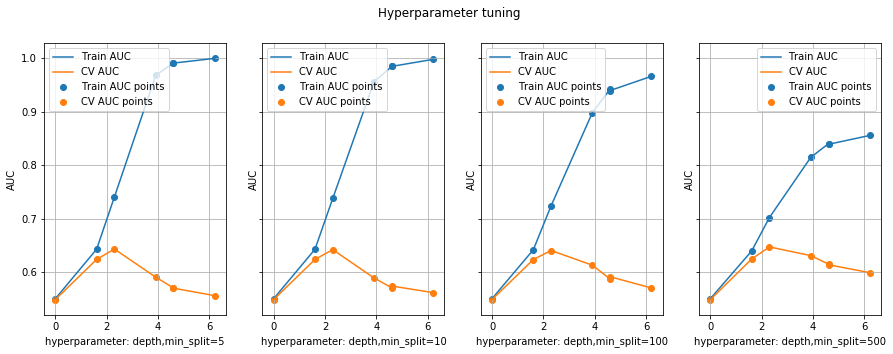

In [75]:
#Plotting parameter tuning results for each min_sample_split

fig, ax = plt.subplots(1, 4, figsize=(15, 5),sharey=True)


ax[0].plot(K_5, train_auc_5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[0].plot(K_5, cv_auc_5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[0].scatter(K_5, train_auc_5, label='Train AUC points')
ax[0].scatter(K_5, cv_auc_5, label='CV AUC points')

ax[0].legend()
ax[0].set_xlabel("hyperparameter: depth,min_split=5")
ax[0].set_ylabel("AUC")
ax[0].grid()


ax[1].plot(K_10, train_auc_10, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[1].plot(K_10, cv_auc_10, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[1].scatter(K_10, train_auc_10, label='Train AUC points')
ax[1].scatter(K_10, cv_auc_10, label='CV AUC points')

ax[1].legend()
ax[1].set_xlabel("hyperparameter: depth,min_split=10")
ax[1].set_ylabel("AUC")
ax[1].grid()


ax[2].plot(K_100, train_auc_100, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[2].plot(K_100, cv_auc_100, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[2].scatter(K_100, train_auc_100, label='Train AUC points')
ax[2].scatter(K_100, cv_auc_100, label='CV AUC points')

ax[2].legend()
ax[2].set_xlabel("hyperparameter: depth,min_split=100")
ax[2].set_ylabel("AUC")
ax[2].grid()


ax[3].plot(K_500, train_auc_500, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[3].plot(K_500, cv_auc_500, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[3].scatter(K_500, train_auc_500, label='Train AUC points')
ax[3].scatter(K_500, cv_auc_500, label='CV AUC points')

ax[3].legend()
ax[3].set_xlabel("hyperparameter: depth,min_split=500")
ax[3].set_ylabel("AUC")
ax[3].grid()
    
fig.suptitle('Hyperparameter tuning')

### Observations
1. For different min_sample_split values, the auc score is similar till depth 10. 
2. As min_sample_split increases, overall overfitting decreases.
3. AUC score is almost same in all cases at depth=5. Also overfitting is also very low.
4. depth=5 and min_sample_split=500 is chosen

### Applying DT for set1: BoW

In [76]:
#Applying DT on BoW with C value selected from above hyperparameter tuning
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

DTclf = DecisionTreeClassifier(max_depth=5,min_samples_split=500,class_weight='balanced')
DTclf.fit(X_train_encoded_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = DTclf.predict_proba(X_train_encoded_bow)[:,1]
y_test_pred = DTclf.predict_proba(X_test_encoded_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

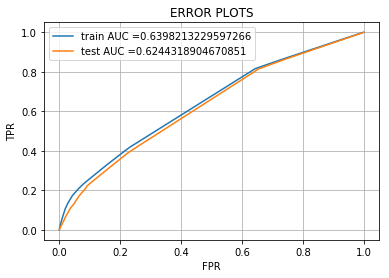

In [77]:
#Plotting ROC curve for both train and test datsets
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Observations
1. test auc for bow encoded data is 0.624
2. The auc scores is slightly lower compared models like logistic regression

In [78]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

#Function to calulate TPR,FPR,TNR and FNR to be included in confusion matrix
def find_rates(mat):
    mat2=[]
    mat2.append((mat[1,0]))
    mat2.append((mat[0,0]))
    mat2.append((mat[0,1]))
    mat2.append((mat[1,1]))
    mat2=np.reshape(mat2,(2,2))
    mat2 = pd.DataFrame(mat2,columns=[0,1],index=[0,1])
    mat2.index.name = 'Predicted'
    mat2.columns.name = 'Actual'
    return mat2

the maximum value of tpr*(1-fpr) 0.3213518401384914 for threshold 0.536
Train confusion matrix
[[ 5710  1716]
 [24223 17392]]
Test confusion matrix
[[ 4121  1338]
 [18057 12536]]


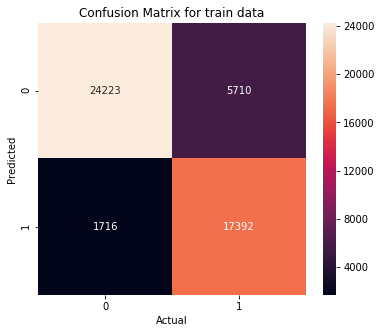

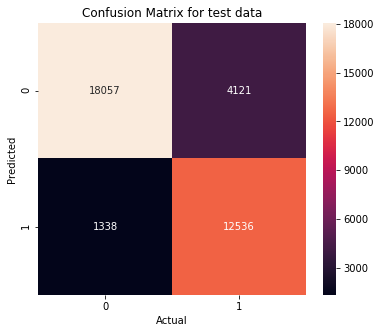

In [79]:
#Creating confusion matrix 
import seaborn as sns

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

mat_train = find_rates(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
mat_test = find_rates(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for train data')
sns.heatmap(mat_train,annot=True,fmt='g')

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for test data')
sns.heatmap(mat_test,annot=True,fmt='g')

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

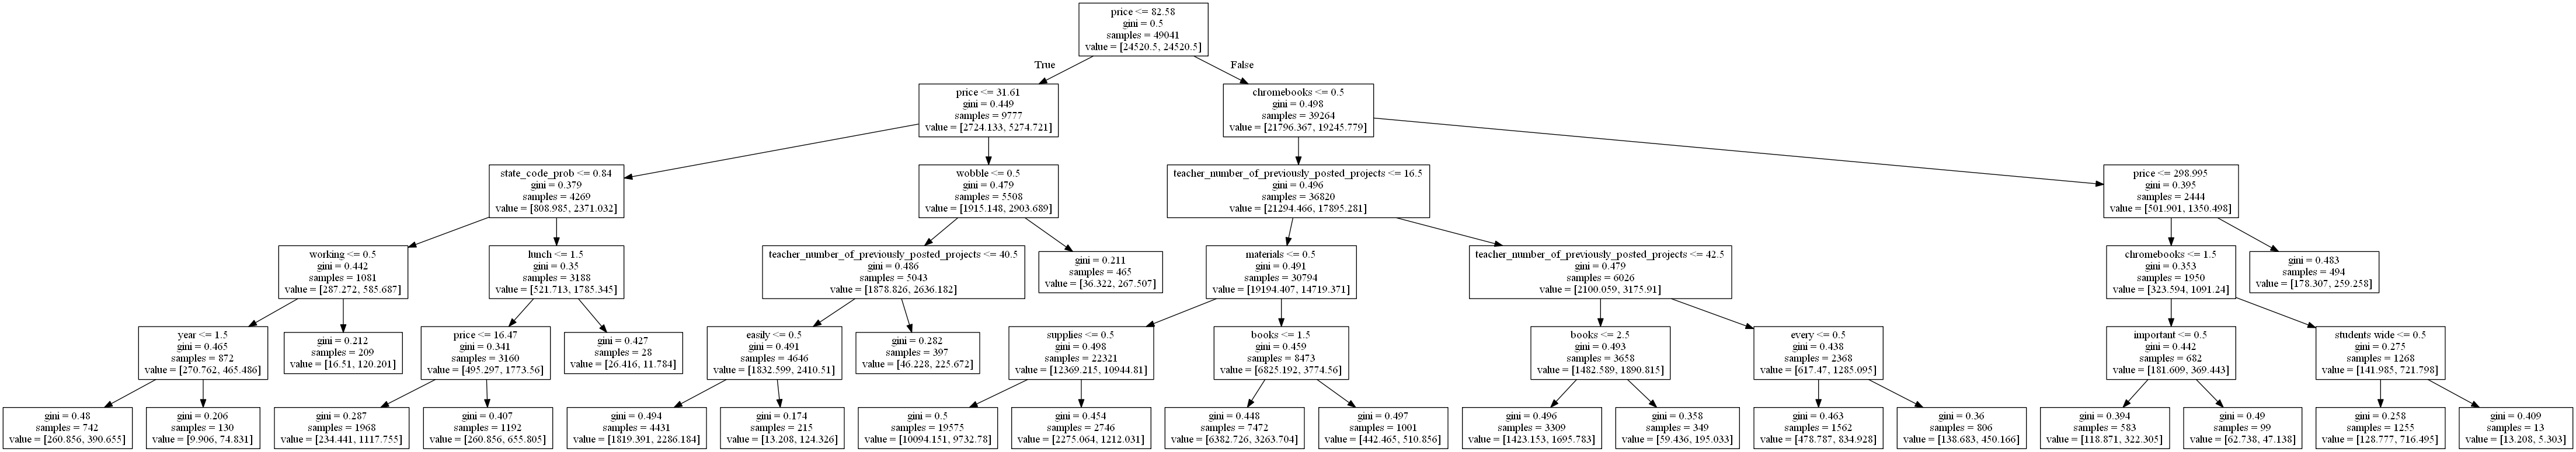

In [80]:
#https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/

#Getting graph data from DTclf and 'features_bow' is used to give fetaures to be displayed in tree
dot_data = tree.export_graphviz(DTclf, out_file=None, feature_names=features_bow)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree_bow.png")
Image(graph.create_png())

#### Above representation of DT shows gini impurity, number of samples and word or feature used to split at each node

### Getting datapoints that contribute to false positives

In [81]:
#https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python

fp_bow = []
y_test_pred_value = predict_with_best_t(y_test_pred, best_t)
for i in range(len(y_test)):
    if y_test[i]==0 and y_test_pred_value[i]==1:
        fp_bow.append(i)
        
# fp_bow stores the list of datapoints from test data that results in false positive

# For wordcloud creation

fp_words=[]  #stores words from datapoints that results in false positive
for i in range(len(fp_bow)):
    for j in X_test['essay'].values[fp_bow[i]].split():
        fp_words.append(j)


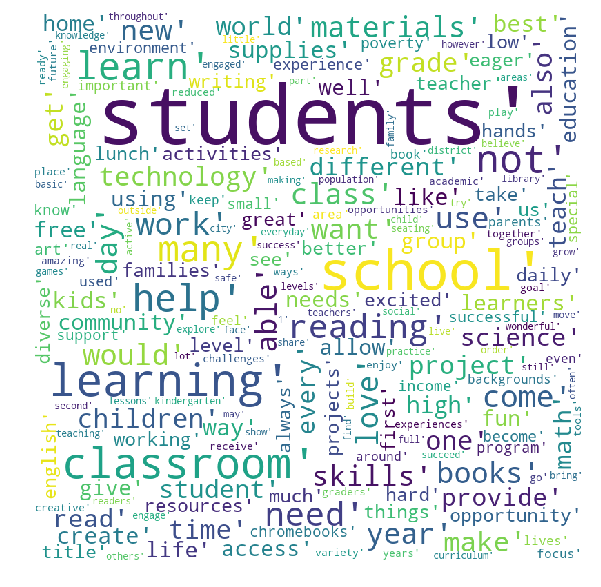

In [82]:
from wordcloud import WordCloud

#Creating wordcloud
#https://www.geeksforgeeks.org/generating-word-cloud-python/
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',collocations=False).generate(str(fp_words))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Observations
1. From the wordcloud, words like students, school, learning, etc are the ones that occur most in project essays that contribute to false positive.
2. So it can be assumed that presence of these words may lead to classification of datapoint as positive even though it is actually negative

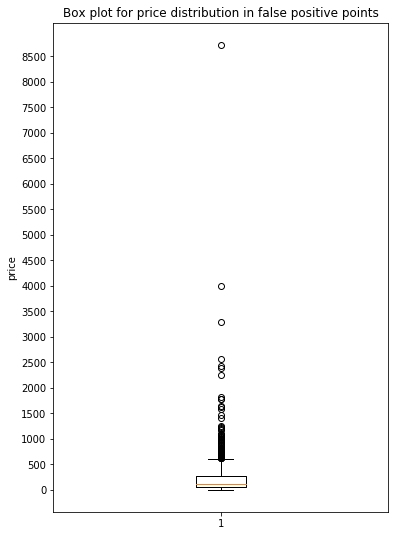

In [135]:
#Boxplot for price from false positive points
fp_price = []
for i in range(len(fp_bow)):
    fp_price.append(X_test['price'].values[fp_bow[i]])
    
plt.figure(figsize=(6,9))
plt.boxplot(fp_price)
plt.yticks(np.arange(0, 9000, 500))
plt.ylabel('price')
plt.title('Box plot for price distribution in false positive points')
plt.show()

### Observations
1. Price for false positive points are distributed more between 0 to 500 range with many outliers above 500

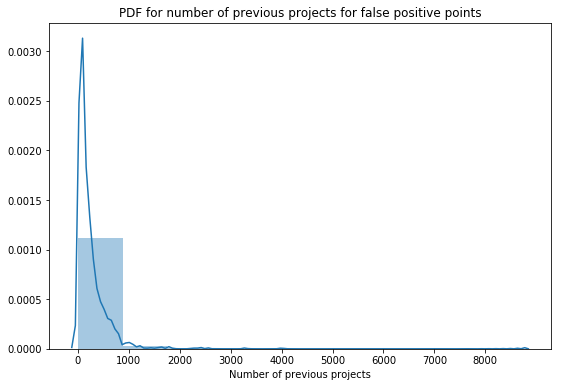

In [137]:
#pdf for previous submitted projects for false positive points
fp_prev_projects = []
for i in range(len(fp_bow)):
    fp_prev_projects.append(X_test['price'].values[fp_bow[i]])

plt.figure(figsize=(9,6))
sns.distplot(fp_prev_projects,bins=10,kde=True)
plt.xticks(np.arange(0, 9000, 1000))
plt.xlabel('Number of previous projects')
plt.title('PDF for number of previous projects for false positive points')
plt.show()

### Observations
1. Number of projects previously submitted is more concentrated below 400.
2. So when the number is lower there is a chance that the project is classified as positive

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [147]:
#Creating datasets with categorical and numerical features and project title and essay in tfidf encoding

X_train_encoded_tfidf = hstack((train_categories_one_hot,train_sub_categories_one_hot,np.array(X_train['state_code_prob']).reshape(-1, 1),train_teacher_prefix_one_hot,train_grade_category_one_hot,train_text_tfidf,train_title_tfidf,np.array(X_train['price']).reshape(-1, 1),np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_cv_encoded_tfidf = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,np.array(X_cv['state_code_prob']).reshape(-1, 1),cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_text_tfidf,cv_title_tfidf,np.array(X_cv['price']).reshape(-1, 1),np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_test_encoded_tfidf = hstack((test_categories_one_hot,test_sub_categories_one_hot,np.array(X_test['state_code_prob']).reshape(-1, 1),test_teacher_prefix_one_hot,test_grade_category_one_hot,test_text_tfidf,test_title_tfidf,np.array(X_test['price']).reshape(-1, 1),np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

print(X_train_encoded_tfidf.shape)
print(X_cv_encoded_tfidf.shape)
print(X_test_encoded_tfidf.shape)

(49041, 7028)
(24155, 7028)
(36052, 7028)


In [148]:
#Creaing set of all fetaure names 
features_tfidf = category_features+subcategory_features
features_tfidf.append('state_code_prob')
features_tfidf = features_tfidf+teacher_prefix_features+grade_features+text_tfidf_features+title_tfidf_features
features_tfidf.append('price')
features_tfidf.append('teacher_number_of_previously_posted_projects')

### Hyperparameter tuning using GridSearchCV

In [89]:
DTclf = DecisionTreeClassifier(class_weight='balanced')  
parameters = {'max_depth':(1, 5, 10, 50, 100, 500, 100),'min_samples_split':(5, 10, 100, 500)}  #creating a parameters

#Initializing GridSearchCV with DT as model, 3 fold cv and roc_auc as scoring metric
GSclf = GridSearchCV(DTclf, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
GSclf.fit(X_train_encoded_tfidf, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': (1, 5, 10, 50, 100, 500, 100), 'min_samples_split': (5, 10, 100, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [90]:

results = pd.DataFrame.from_dict(GSclf.cv_results_)
results = results.sort_values(['param_max_depth'])

#Creating different set of results for each min_sample_split

train_auc_5= results[results['param_min_samples_split']==5]['mean_train_score']
cv_auc_5 = results[results['param_min_samples_split']==5]['mean_test_score']
K_5 =  np.log(np.array(results[results['param_min_samples_split']==5]['param_max_depth'],dtype='float64'))

train_auc_10 = results[results['param_min_samples_split']==10]['mean_train_score']
cv_auc_10 = results[results['param_min_samples_split']==10]['mean_test_score']
K_10 =  np.log(np.array(results[results['param_min_samples_split']==10]['param_max_depth'],dtype='float64'))

train_auc_100 = results[results['param_min_samples_split']==100]['mean_train_score']
cv_auc_100 = results[results['param_min_samples_split']==100]['mean_test_score']
K_100 =  np.log(np.array(results[results['param_min_samples_split']==100]['param_max_depth'],dtype='float64'))

train_auc_500 = results[results['param_min_samples_split']==500]['mean_train_score']
cv_auc_500 = results[results['param_min_samples_split']==500]['mean_test_score']
K_500 =  np.log(np.array(results[results['param_min_samples_split']==500]['param_max_depth'],dtype='float64'))

Text(0.5, 0.98, 'Hyperparameter tuning')

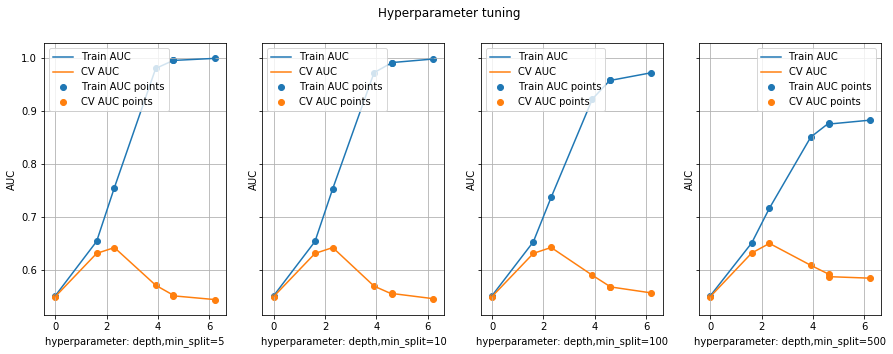

In [91]:
#Plotting parameter tuning results for each min_sample_split

fig, ax = plt.subplots(1, 4, figsize=(15, 5),sharey=True)


ax[0].plot(K_5, train_auc_5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[0].plot(K_5, cv_auc_5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[0].scatter(K_5, train_auc_5, label='Train AUC points')
ax[0].scatter(K_5, cv_auc_5, label='CV AUC points')

ax[0].legend()
ax[0].set_xlabel("hyperparameter: depth,min_split=5")
ax[0].set_ylabel("AUC")
ax[0].grid()


ax[1].plot(K_10, train_auc_10, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[1].plot(K_10, cv_auc_10, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[1].scatter(K_10, train_auc_10, label='Train AUC points')
ax[1].scatter(K_10, cv_auc_10, label='CV AUC points')

ax[1].legend()
ax[1].set_xlabel("hyperparameter: depth,min_split=10")
ax[1].set_ylabel("AUC")
ax[1].grid()


ax[2].plot(K_100, train_auc_100, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[2].plot(K_100, cv_auc_100, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[2].scatter(K_100, train_auc_100, label='Train AUC points')
ax[2].scatter(K_100, cv_auc_100, label='CV AUC points')

ax[2].legend()
ax[2].set_xlabel("hyperparameter: depth,min_split=100")
ax[2].set_ylabel("AUC")
ax[2].grid()


ax[3].plot(K_500, train_auc_500, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[3].plot(K_500, cv_auc_500, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[3].scatter(K_500, train_auc_500, label='Train AUC points')
ax[3].scatter(K_500, cv_auc_500, label='CV AUC points')

ax[3].legend()
ax[3].set_xlabel("hyperparameter: depth,min_split=500")
ax[3].set_ylabel("AUC")
ax[3].grid()
    
fig.suptitle('Hyperparameter tuning')

### Observations
1. For different min_sample_split values, the auc score is similar till depth 10. 
2. As min_sample_split increases, overall overfitting decreases.
3. AUC score is almost same in all cases at depth=5. Also overfitting is also very low.
4. Also not much difference between depth=5 and 10
4. depth=5 and min_sample_split=500 is chosen

### Applying DT for set1: TFIDF

In [169]:
#Applying DT on TFIDF with C value selected from above hyperparameter tuning
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

#regularization used is L1.
DTclf = DecisionTreeClassifier(max_depth=5,min_samples_split=500,class_weight='balanced')
DTclf.fit(X_train_encoded_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = DTclf.predict_proba(X_train_encoded_tfidf)[:,1]
y_test_pred = DTclf.predict_proba(X_test_encoded_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

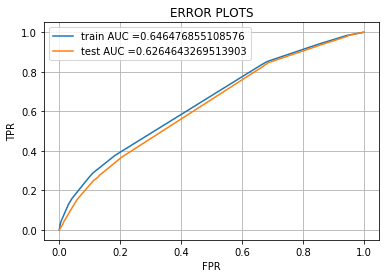

In [150]:
#Plotting ROC curve for both train and test datsets
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Observations
1. test auc for tfidf encoded data is 0.626
2. The auc scores is similar to that of bow encoded data

the maximum value of tpr*(1-fpr) 0.30803746227870366 for threshold 0.551
Train confusion matrix
[[ 6066  1360]
 [25922 15693]]
Test confusion matrix
[[ 4340  1119]
 [19334 11259]]


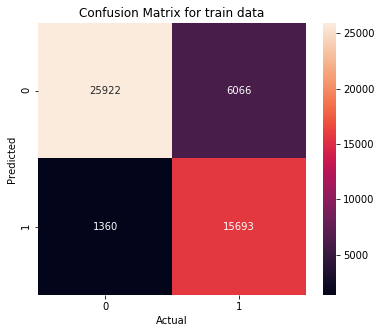

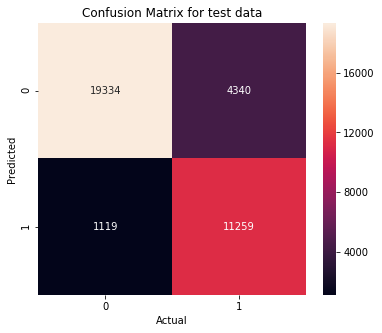

In [151]:
#Creating confusion matrix 
import seaborn as sns

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

mat_train = find_rates(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
mat_test = find_rates(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for train data')
sns.heatmap(mat_train,annot=True,fmt='g')

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for test data')
sns.heatmap(mat_test,annot=True,fmt='g')


#### 2.4.1.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

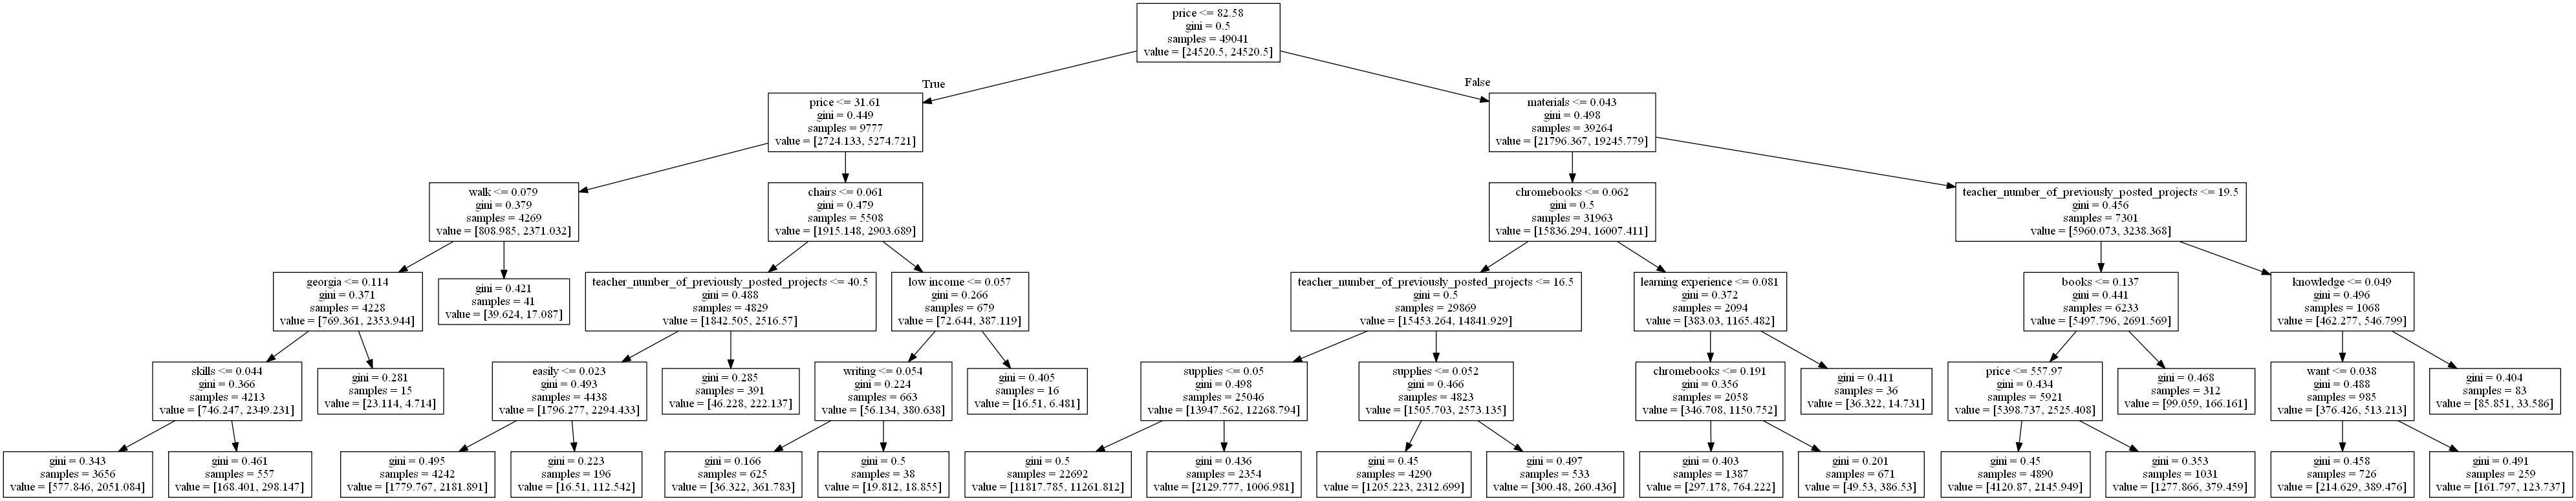

In [152]:
#https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/

#Getting graph data from DTclf and 'features_tfidf' is used to give fetaures to be displayed in tree
dot_data = tree.export_graphviz(DTclf, out_file=None, feature_names=features_tfidf)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree_tfidf.png")
Image(graph.create_png())

#### Above representation of DT shows gini impurity, number of samples and word or feature used to split at each node

### Getting datapoints that contribute to false positives

In [153]:
#https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python

fp_tfidf = []
y_test_pred_value = predict_with_best_t(y_test_pred, best_t)
for i in range(len(y_test)):
    if y_test[i]==0 and y_test_pred_value[i]==1:
        fp_tfidf.append(i)
        
# fp_tfidf stores the list of datapoints from test data that results in false positive

# For wordcloud creation

fp_words=[]  #stores words from datapoints that results in false positive
for i in range(len(fp_tfidf)):
    for j in X_test['essay'].values[fp_tfidf[i]].split():
        fp_words.append(j)

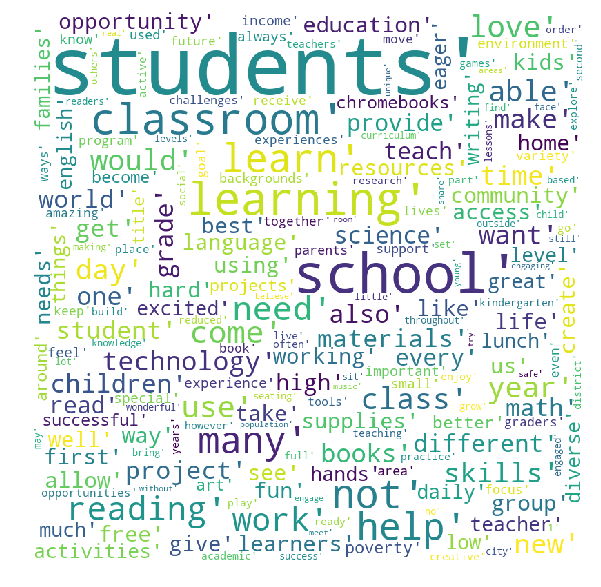

In [154]:
#Creating wordcloud
#https://www.geeksforgeeks.org/generating-word-cloud-python/
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',collocations=False).generate(str(fp_words))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Observations
1. From the wordcloud, words like students, school, learning, etc are the ones that occur most in project essays that contribute to false positive.
2. So it can be assumed that presence of these words may lead to classification of datapoint as positive even though it is actually negative


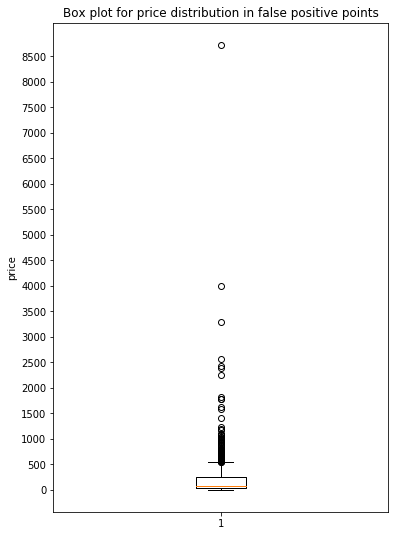

In [139]:
#Boxplot for price from false positive points
fp_price = []
for i in range(len(fp_tfidf)):
    fp_price.append(X_test['price'].values[fp_tfidf[i]])

plt.figure(figsize=(6,9))
plt.boxplot(fp_price)
plt.yticks(np.arange(0, 9000, 500))
plt.ylabel('price')
plt.title('Box plot for price distribution in false positive points')
plt.show()

### Observations
1. Price for false positive points are distributed more between 0 to 500 range with many outliers above 500

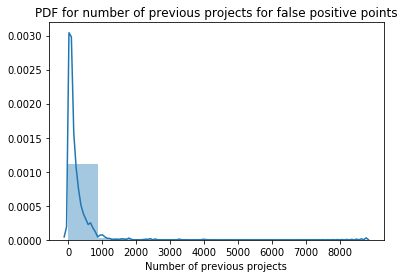

In [140]:
#pdf for previous submitted projects for false positive points
fp_prev_projects = []
for i in range(len(fp_tfidf)):
    fp_prev_projects.append(X_test['price'].values[fp_tfidf[i]])
    
sns.distplot(fp_prev_projects,bins=10,kde=True)
plt.xticks(np.arange(0, 9000, 1000))
plt.xlabel('Number of previous projects')
plt.title('PDF for number of previous projects for false positive points')
plt.show()

### Observations
1. Number of projects previously submitted is more concentrated below 400.
2. So when the number is lower there is a chance that the project is classified as positive

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [103]:
#Creating datasets with categorical and numerical features and project title and essay in avg encoding

X_train_encoded_avg = hstack((train_categories_one_hot,train_sub_categories_one_hot,np.array(X_train['state_code_prob']).reshape(-1, 1),train_teacher_prefix_one_hot,train_grade_category_one_hot,train_avg_w2v_vectors,train_title_avg_w2v_vectors,np.array(X_train['price']).reshape(-1, 1),np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_cv_encoded_avg = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,np.array(X_cv['state_code_prob']).reshape(-1, 1),cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_avg_w2v_vectors,cv_title_avg_w2v_vectors,np.array(X_cv['price']).reshape(-1, 1),np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_test_encoded_avg = hstack((test_categories_one_hot,test_sub_categories_one_hot,np.array(X_test['state_code_prob']).reshape(-1, 1),test_teacher_prefix_one_hot,test_grade_category_one_hot,test_avg_w2v_vectors,test_title_avg_w2v_vectors,np.array(X_test['price']).reshape(-1, 1),np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

print(X_train_encoded_avg.shape)
print(X_cv_encoded_avg.shape)
print(X_test_encoded_avg.shape)

(49041, 651)
(24155, 651)
(36052, 651)


### Hyperparameter tuning using GridSearchCV

In [104]:
DTclf = DecisionTreeClassifier(class_weight='balanced')  
parameters = {'max_depth':(1, 5, 10, 50, 100, 500, 100),'min_samples_split':(5, 10, 100, 500)}  #creating a parameters

#Initializing GridSearchCV with DT as model, 3 fold cv and roc_auc as scoring metric
GSclf = GridSearchCV(DTclf, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
GSclf.fit(X_train_encoded_avg, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': (1, 5, 10, 50, 100, 500, 100), 'min_samples_split': (5, 10, 100, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [105]:
results = pd.DataFrame.from_dict(GSclf.cv_results_)
results = results.sort_values(['param_max_depth'])

#Creating different set of results for each min_sample_split

train_auc_5= results[results['param_min_samples_split']==5]['mean_train_score']
cv_auc_5 = results[results['param_min_samples_split']==5]['mean_test_score']
K_5 =  np.log(np.array(results[results['param_min_samples_split']==5]['param_max_depth'],dtype='float64'))

train_auc_10 = results[results['param_min_samples_split']==10]['mean_train_score']
cv_auc_10 = results[results['param_min_samples_split']==10]['mean_test_score']
K_10 =  np.log(np.array(results[results['param_min_samples_split']==10]['param_max_depth'],dtype='float64'))

train_auc_100 = results[results['param_min_samples_split']==100]['mean_train_score']
cv_auc_100 = results[results['param_min_samples_split']==100]['mean_test_score']
K_100 =  np.log(np.array(results[results['param_min_samples_split']==100]['param_max_depth'],dtype='float64'))

train_auc_500 = results[results['param_min_samples_split']==500]['mean_train_score']
cv_auc_500 = results[results['param_min_samples_split']==500]['mean_test_score']
K_500 =  np.log(np.array(results[results['param_min_samples_split']==500]['param_max_depth'],dtype='float64'))

Text(0.5, 0.98, 'Hyperparameter tuning')

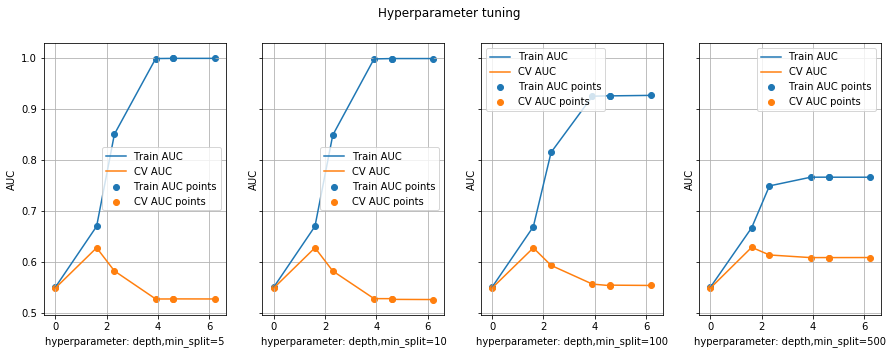

In [106]:
#Plotting parameter tuning results for each min_sample_split

fig, ax = plt.subplots(1, 4, figsize=(15, 5),sharey=True)


ax[0].plot(K_5, train_auc_5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[0].plot(K_5, cv_auc_5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[0].scatter(K_5, train_auc_5, label='Train AUC points')
ax[0].scatter(K_5, cv_auc_5, label='CV AUC points')

ax[0].legend()
ax[0].set_xlabel("hyperparameter: depth,min_split=5")
ax[0].set_ylabel("AUC")
ax[0].grid()


ax[1].plot(K_10, train_auc_10, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[1].plot(K_10, cv_auc_10, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[1].scatter(K_10, train_auc_10, label='Train AUC points')
ax[1].scatter(K_10, cv_auc_10, label='CV AUC points')

ax[1].legend()
ax[1].set_xlabel("hyperparameter: depth,min_split=10")
ax[1].set_ylabel("AUC")
ax[1].grid()


ax[2].plot(K_100, train_auc_100, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[2].plot(K_100, cv_auc_100, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[2].scatter(K_100, train_auc_100, label='Train AUC points')
ax[2].scatter(K_100, cv_auc_100, label='CV AUC points')

ax[2].legend()
ax[2].set_xlabel("hyperparameter: depth,min_split=100")
ax[2].set_ylabel("AUC")
ax[2].grid()


ax[3].plot(K_500, train_auc_500, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[3].plot(K_500, cv_auc_500, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[3].scatter(K_500, train_auc_500, label='Train AUC points')
ax[3].scatter(K_500, cv_auc_500, label='CV AUC points')

ax[3].legend()
ax[3].set_xlabel("hyperparameter: depth,min_split=500")
ax[3].set_ylabel("AUC")
ax[3].grid()
    
fig.suptitle('Hyperparameter tuning')

### Observations
1. For different min_sample_split values, the auc score is similar till depth 10. 
2. As min_sample_split increases, overall overfitting decreases.
3. AUC score is almost same in all cases at depth=5. Also overfitting is also very low.
4. depth=5 and min_sample_split=500 is chosen

### Applying DT for set3: avg

In [107]:
#Applying DT on avg with C value selected from above hyperparameter tuning
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

#regularization used is L1.
DTclf = DecisionTreeClassifier(max_depth=5,min_samples_split=500,class_weight='balanced')
DTclf.fit(X_train_encoded_avg, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = DTclf.predict_proba(X_train_encoded_avg)[:,1]
y_test_pred = DTclf.predict_proba(X_test_encoded_avg)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

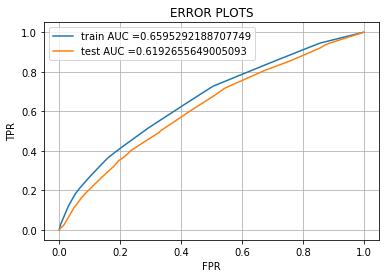

In [108]:
#Plotting ROC curve for both train and test datsets
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Observations
1. test auc for bow encoded data is 0.619
2. The auc scores is slightly reduced compared to bow and tfidf encoded data

the maximum value of tpr*(1-fpr) 0.37385762600944317 for threshold 0.501
Train confusion matrix
[[ 4405  3021]
 [15387 26228]]
Test confusion matrix
[[ 3044  2415]
 [11803 18790]]


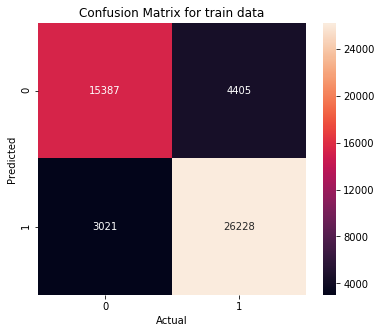

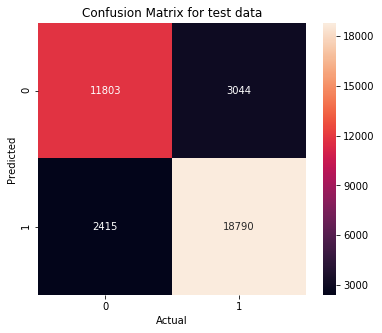

In [109]:
#Creating confusion matrix 
import seaborn as sns

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

mat_train = find_rates(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
mat_test = find_rates(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for train data')
sns.heatmap(mat_train,annot=True,fmt='g')

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for test data')
sns.heatmap(mat_test,annot=True,fmt='g')

### Getting datapoints that contribute to false positives

In [110]:
#https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python

fp_avg = []
y_test_pred_value = predict_with_best_t(y_test_pred, best_t)
for i in range(len(y_test)):
    if y_test[i]==0 and y_test_pred_value[i]==1:
        fp_avg.append(i)
        
# fp_avg stores the list of datapoints from test data that results in false positive

# For wordcloud creation

fp_words=[]  #stores words from datapoints that results in false positive
for i in range(len(fp_avg)):
    for j in X_test['essay'].values[fp_avg[i]].split():
        fp_words.append(j)

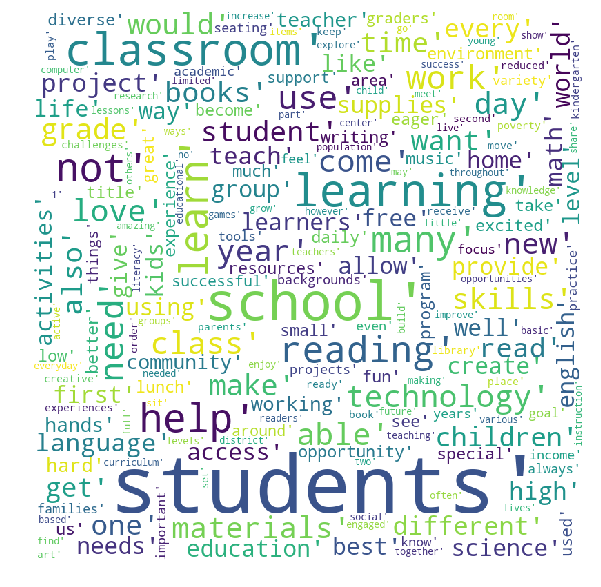

In [111]:
#Creating wordcloud
#https://www.geeksforgeeks.org/generating-word-cloud-python/
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',collocations=False).generate(str(fp_words))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Observations
1. From the wordcloud, words like students, school, learning, etc are the ones that occur most in project essays that contribute to false positive.
2. So it can be assumed that presence of these words may lead to classification of datapoint as positive even though it is actually negative


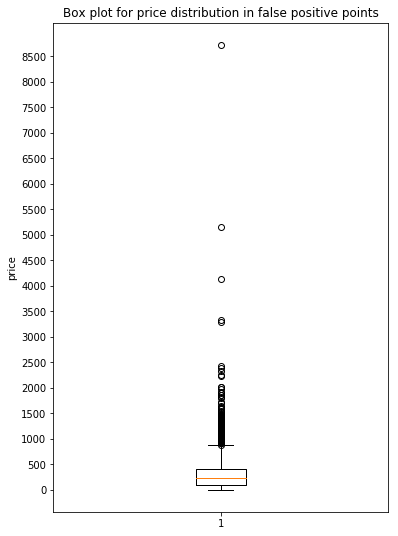

In [141]:
#Boxplot for price from false positive points
fp_price = []
for i in range(len(fp_avg)):
    fp_price.append(X_test['price'].values[fp_avg[i]])
    
plt.figure(figsize=(6,9))
plt.boxplot(fp_price)
plt.yticks(np.arange(0, 9000, 500))
plt.ylabel('price')
plt.title('Box plot for price distribution in false positive points')
plt.show()

### Observations
1. Price for false positive points are distributed more between 0 to 500 range with many outliers above 500

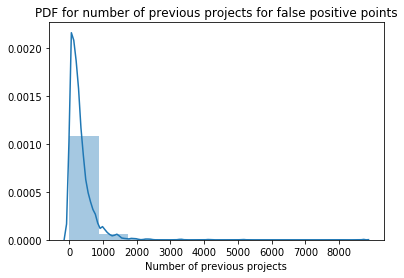

In [142]:
#pdf for previous submitted projects for false positive points
fp_prev_projects = []
for i in range(len(fp_avg)):
    fp_prev_projects.append(X_test['price'].values[fp_avg[i]])
    
sns.distplot(fp_prev_projects,bins=10,kde=True)
plt.xticks(np.arange(0, 9000, 1000))
plt.xlabel('Number of previous projects')
plt.title('PDF for number of previous projects for false positive points')
plt.show()


### Observations
1. Number of projects previously submitted is more concentrated below 400.
2. So when the number is lower there is a chance that the project is classified as positive

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [115]:
#Creating datasets with categorical and numerical features and project title and essay in tfidf_w2v encoding

X_train_encoded_tfidf_w2v = hstack((train_categories_one_hot,train_sub_categories_one_hot,np.array(X_train['state_code_prob']).reshape(-1, 1),train_teacher_prefix_one_hot,train_grade_category_one_hot,train_tfidf_w2v_vectors,train_title_tfidf_w2v_vectors,np.array(X_train['price']).reshape(-1, 1),np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_cv_encoded_tfidf_w2v = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,np.array(X_cv['state_code_prob']).reshape(-1, 1),cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_tfidf_w2v_vectors,cv_title_tfidf_w2v_vectors,np.array(X_cv['price']).reshape(-1, 1),np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

X_test_encoded_tfidf_w2v = hstack((test_categories_one_hot,test_sub_categories_one_hot,np.array(X_test['state_code_prob']).reshape(-1, 1),test_teacher_prefix_one_hot,test_grade_category_one_hot,test_tfidf_w2v_vectors,test_title_tfidf_w2v_vectors,np.array(X_test['price']).reshape(-1, 1),np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1, 1)))

print(X_train_encoded_tfidf_w2v.shape)
print(X_cv_encoded_tfidf_w2v.shape)
print(X_test_encoded_tfidf_w2v.shape)

(49041, 651)
(24155, 651)
(36052, 651)


### Hyperparameter tuning using GridSearchCV

In [116]:
DTclf = DecisionTreeClassifier(class_weight='balanced')  
parameters = {'max_depth':(1, 5, 10, 50, 100, 500, 100),'min_samples_split':(5, 10, 100, 500)}  #creating a parameters

#Initializing GridSearchCV with DT as model, 3 fold cv and roc_auc as scoring metric
GSclf = GridSearchCV(DTclf, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
GSclf.fit(X_train_encoded_tfidf_w2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': (1, 5, 10, 50, 100, 500, 100), 'min_samples_split': (5, 10, 100, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [117]:
results = pd.DataFrame.from_dict(GSclf.cv_results_)
results = results.sort_values(['param_max_depth'])

#Creating different set of results for each min_sample_split

train_auc_5= results[results['param_min_samples_split']==5]['mean_train_score']
cv_auc_5 = results[results['param_min_samples_split']==5]['mean_test_score']
K_5 =  np.log(np.array(results[results['param_min_samples_split']==5]['param_max_depth'],dtype='float64'))

train_auc_10 = results[results['param_min_samples_split']==10]['mean_train_score']
cv_auc_10 = results[results['param_min_samples_split']==10]['mean_test_score']
K_10 =  np.log(np.array(results[results['param_min_samples_split']==10]['param_max_depth'],dtype='float64'))

train_auc_100 = results[results['param_min_samples_split']==100]['mean_train_score']
cv_auc_100 = results[results['param_min_samples_split']==100]['mean_test_score']
K_100 =  np.log(np.array(results[results['param_min_samples_split']==100]['param_max_depth'],dtype='float64'))

train_auc_500 = results[results['param_min_samples_split']==500]['mean_train_score']
cv_auc_500 = results[results['param_min_samples_split']==500]['mean_test_score']
K_500 =  np.log(np.array(results[results['param_min_samples_split']==500]['param_max_depth'],dtype='float64'))


Text(0.5, 0.98, 'Hyperparameter tuning')

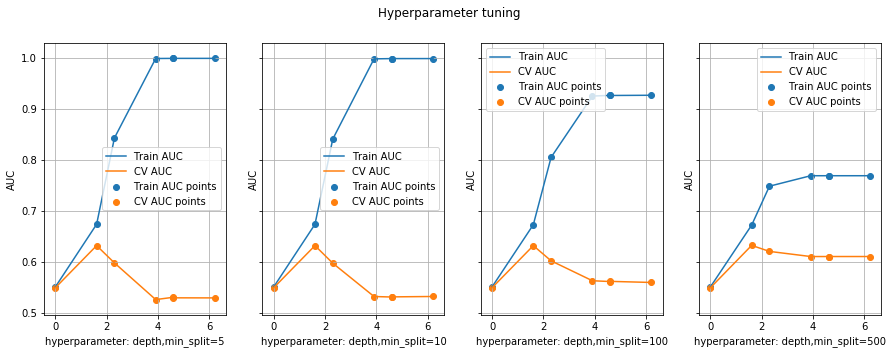

In [118]:
#Plotting parameter tuning results for each min_sample_split

fig, ax = plt.subplots(1, 4, figsize=(15, 5),sharey=True)


ax[0].plot(K_5, train_auc_5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[0].plot(K_5, cv_auc_5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[0].scatter(K_5, train_auc_5, label='Train AUC points')
ax[0].scatter(K_5, cv_auc_5, label='CV AUC points')

ax[0].legend()
ax[0].set_xlabel("hyperparameter: depth,min_split=5")
ax[0].set_ylabel("AUC")
ax[0].grid()


ax[1].plot(K_10, train_auc_10, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[1].plot(K_10, cv_auc_10, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[1].scatter(K_10, train_auc_10, label='Train AUC points')
ax[1].scatter(K_10, cv_auc_10, label='CV AUC points')

ax[1].legend()
ax[1].set_xlabel("hyperparameter: depth,min_split=10")
ax[1].set_ylabel("AUC")
ax[1].grid()


ax[2].plot(K_100, train_auc_100, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[2].plot(K_100, cv_auc_100, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[2].scatter(K_100, train_auc_100, label='Train AUC points')
ax[2].scatter(K_100, cv_auc_100, label='CV AUC points')

ax[2].legend()
ax[2].set_xlabel("hyperparameter: depth,min_split=100")
ax[2].set_ylabel("AUC")
ax[2].grid()


ax[3].plot(K_500, train_auc_500, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
ax[3].plot(K_500, cv_auc_500, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

ax[3].scatter(K_500, train_auc_500, label='Train AUC points')
ax[3].scatter(K_500, cv_auc_500, label='CV AUC points')

ax[3].legend()
ax[3].set_xlabel("hyperparameter: depth,min_split=500")
ax[3].set_ylabel("AUC")
ax[3].grid()
    
fig.suptitle('Hyperparameter tuning')

### Observations
1. For different min_sample_split values, the auc score is similar till depth 10. 
2. As min_sample_split increases, overall overfitting decreases.
3. AUC score is almost same in all cases at depth=5. Also overfitting is also very low.
4. depth=5 and min_sample_split=500 is chosen

### Applying DT for set1: tfidf_w2v

In [119]:
#Applying DT on tfidf_w2v with C value selected from above hyperparameter tuning
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

#regularization used is L1.
DTclf = DecisionTreeClassifier(max_depth=5,min_samples_split=500,class_weight='balanced')
DTclf.fit(X_train_encoded_tfidf_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = DTclf.predict_proba(X_train_encoded_tfidf_w2v)[:,1]
y_test_pred = DTclf.predict_proba(X_test_encoded_tfidf_w2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

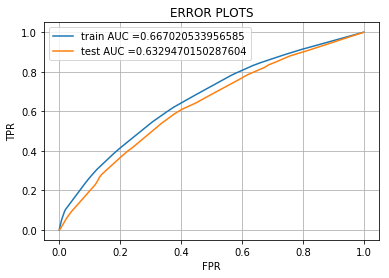

In [120]:
#Plotting ROC curve for both train and test datsets
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Observations
1. test auc for bow encoded data is 0.632
2. The auc scores is better compared to other text encodings


the maximum value of tpr*(1-fpr) 0.38758984275432856 for threshold 0.509
Train confusion matrix
[[ 4644  2782]
 [15823 25792]]
Test confusion matrix
[[ 3262  2197]
 [11937 18656]]


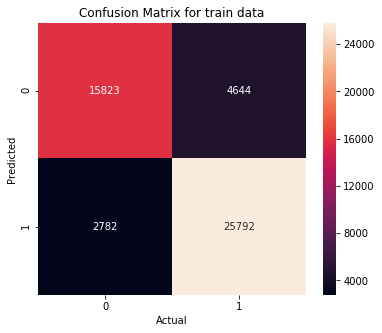

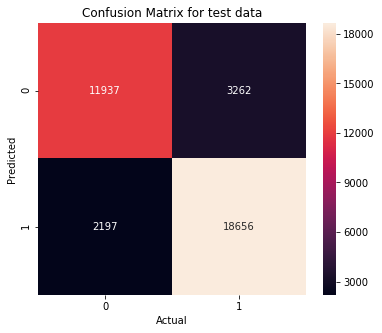

In [121]:
#Creating confusion matrix 
import seaborn as sns

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

mat_train = find_rates(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
mat_test = find_rates(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for train data')
sns.heatmap(mat_train,annot=True,fmt='g')

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for test data')
sns.heatmap(mat_test,annot=True,fmt='g')

### Getting datapoints that contribute to false positives

In [122]:
#https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python

fp_tfidf_w2v = []
y_test_pred_value = predict_with_best_t(y_test_pred, best_t)
for i in range(len(y_test)):
    if y_test[i]==0 and y_test_pred_value[i]==1:
        fp_tfidf_w2v.append(i)
        
# fp_tfidf_w2v stores the list of datapoints from test data that results in false positive

# For wordcloud creation

fp_words=[]  #stores words from datapoints that results in false positive
for i in range(len(fp_tfidf_w2v)):
    for j in X_test['essay'].values[fp_tfidf_w2v[i]].split():
        fp_words.append(j)

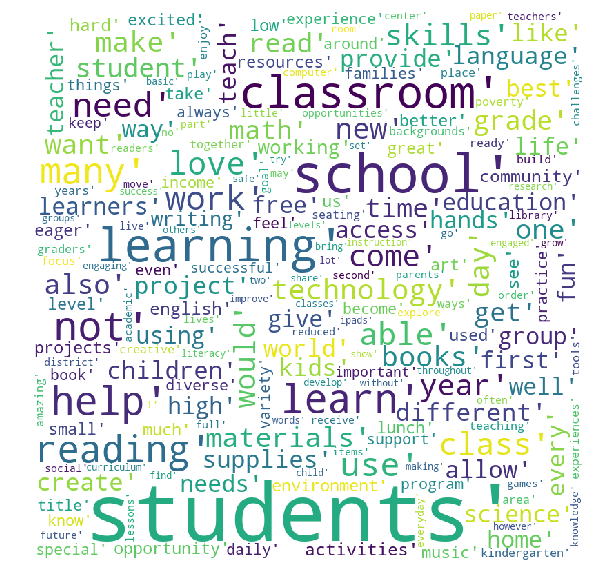

In [123]:
#Creating wordcloud
#https://www.geeksforgeeks.org/generating-word-cloud-python/
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',collocations=False).generate(str(fp_words))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Observations
1. From the wordcloud, words like students, school, learning, etc are the ones that occur most in project essays that contribute to false positive.
2. So it can be assumed that presence of these words may lead to classification of datapoint as positive even though it is actually negative


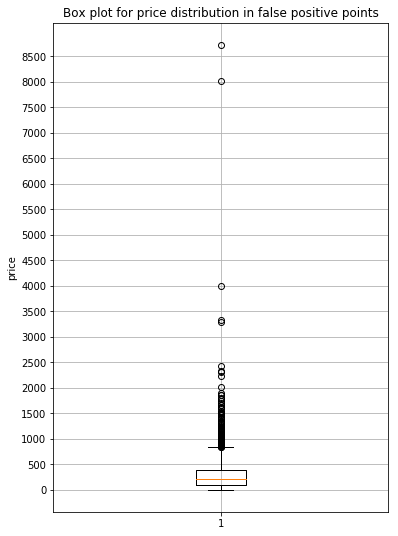

In [189]:
#Boxplot for price from false positive points
fp_price = []
for i in range(len(fp_tfidf_w2v)):
    fp_price.append(X_test['price'].values[fp_tfidf_w2v[i]])
    
plt.figure(figsize=(6,9))
plt.boxplot(fp_price)
plt.yticks(np.arange(0, 9000, 500))
plt.ylabel('price')
plt.title('Box plot for price distribution in false positive points')
plt.grid()
plt.show()

### Observations
1. Price for false positive points are distributed more between 0 to 500 range with many outliers above 500


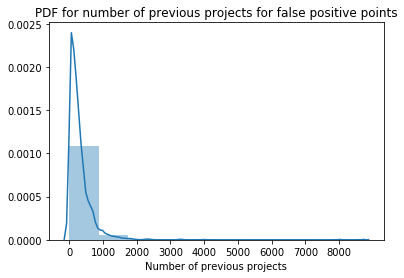

In [146]:
#pdf for previous submitted projects for false positive points
fp_prev_projects = []
for i in range(len(fp_tfidf_w2v)):
    fp_prev_projects.append(X_test['price'].values[fp_tfidf_w2v[i]])
    
sns.distplot(fp_prev_projects,bins=10,kde=True)
plt.xticks(np.arange(0, 9000, 1000))
plt.xlabel('Number of previous projects')
plt.title('PDF for number of previous projects for false positive points')
plt.show()


### Observations
1. Number of projects previously submitted is more concentrated below 400.
2. So when the number is lower there is a chance that the project is classified as positive

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [180]:
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

from sklearn.feature_selection import SelectFromModel

#sfm to select features based on feature importance from DTclf
#prefit is set as prefit model DTclf is used

sfm = SelectFromModel(DTclf,prefit=True,threshold=-np.inf,max_features=5000)
X_train_encoded_tfidf_imp = sfm.transform(X_train_encoded_tfidf)
X_cv_encoded_tfidf_imp = sfm.transform(X_cv_encoded_tfidf)
X_test_encoded_tfidf_imp = sfm.transform(X_test_encoded_tfidf)

print(X_train_encoded_tfidf_imp.shape)
print(X_cv_encoded_tfidf_imp.shape)
print(X_test_encoded_tfidf_imp.shape)

(49041, 5000)
(24155, 5000)
(36052, 5000)


### Using logistic regression on selected 5k features

In [181]:
# Hyperparameter tuning using GridSearchCV

from sklearn.linear_model import LogisticRegression

LRclf = LogisticRegression(penalty='l1')  
parameters = {'C':(0.001,0.01,0.1,1,5,10)}  #creating a parameter distribution from which parameters will be selected on random in RandomizedSearchCV


#Initializing GridSearchCV with LR as model, 3 fold cv and roc_auc as scoring metric
GSclf = GridSearchCV(LRclf, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
GSclf.fit(X_train_encoded_tfidf_imp, y_train)

results = pd.DataFrame.from_dict(GSclf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
K =  np.log(np.array(results['param_C'],dtype='float64'))

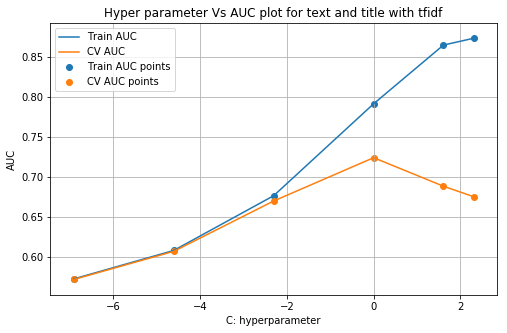

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.691153      0.077111         0.020945        0.007099   0.001   
1       1.238024      0.387741         0.016956        0.000814    0.01   
2       1.908233      0.673663         0.015625        0.001245     0.1   
3       1.865184      0.604089         0.014296        0.002488       1   
4       2.132640      0.462123         0.013630        0.002860       5   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.574831           0.563162           0.578477   
1   {'C': 0.01}           0.606446           0.601140           0.614001   
2    {'C': 0.1}           0.665648           0.674465           0.670072   
3      {'C': 1}           0.723544           0.717550           0.731224   
4      {'C': 5}           0.690644           0.680969           0.693932   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.572157        0.006532                6            0.569125   
1         0.607195        0.005277                5            0.607696   
2         0.670062        0.003600                4            0.674004   
3         0.724106        0.005597                1            0.792662   
4         0.688515        0.005502                2            0.864943   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.575777            0.573559          0.572820         0.002766  
1            0.608356            0.608929          0.608327         0.000504  
2            0.680222            0.675704          0.676643         0.002624  
3            0.794294            0.787156          0.791371         0.003054  
4            0.867059            0.862021          0.864674         0.002065

In [182]:
#Plotting AUC for different hyper parameter values

plt.figure(figsize=(8,5))

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot for text and title with tfidf")
plt.grid()
plt.show()

results.head()

### Observations
1. parameter, c=0.1 is selected as it has got resonable auc score and less overfitting

### Applying LR for set1: tfidf with selected features

In [183]:
#APplying LR on tfidf with C value selected from above hyperparameter tuning
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

#regularization used is L1.
LRclf = LogisticRegression(C=0.1,penalty='l1',class_weight='balanced')
LRclf.fit(X_train_encoded_tfidf_imp, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = LRclf.predict_proba(X_train_encoded_tfidf_imp)[:,1]
y_test_pred = LRclf.predict_proba(X_test_encoded_tfidf_imp)[:,1]

#y_train_pred = batch_predict(LRclf, X_train_encoded_tfidf)    
#y_test_pred = batch_predict(LRclf, X_test_encoded_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

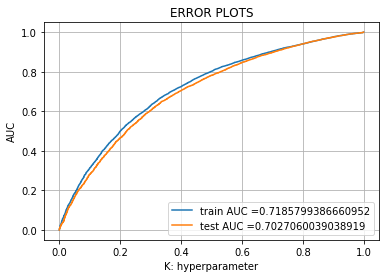

In [184]:
#Plotting ROC curve for both train and test datsets
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Observations
1. auc score for LR on selcted features is 0.702.
2. LR on 5k selected features work much better compared to DT on all the features taken together

the maximum value of tpr*(1-fpr) 0.44612751538274276 for threshold 0.491
Train confusion matrix
[[ 4965  2461]
 [13847 27768]]
Test confusion matrix
[[ 3555  1904]
 [10447 20146]]


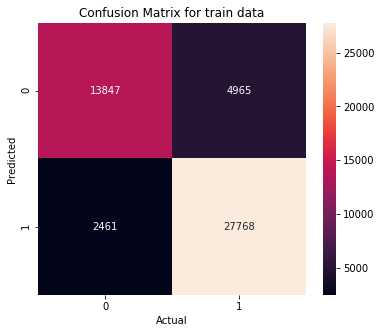

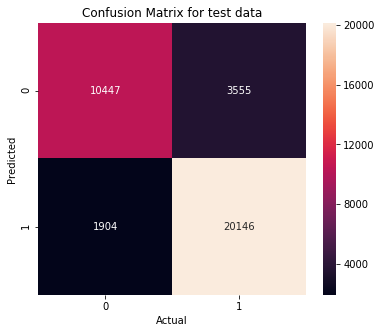

In [185]:
#Creating confustion matrix 
import seaborn as sns

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

mat_train = find_rates(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
mat_test = find_rates(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for train data')
sns.heatmap(mat_train,annot=True,fmt='g')

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for test data')
sns.heatmap(mat_test,annot=True,fmt='g')

<h1>3. Conclusion</h1>

In [187]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Vectorizer','Model','Hyperparameter','AUC']

vect=['BoW','TFIDF','AVG W2V','TFIDF W2V','selected features']
model=['DT','DT','DT','DT','LR']
hyper=['5,500','5,500','5,500','5,500','0.1']
auc=['0.624','0.626','0.619','0.632','0.702']

for i in range(0,5):
    x.add_row([vect[i],model[i],hyper[i],auc[i]])
print(x)

+-------------------+-------+----------------+-------+
|     Vectorizer    | Model | Hyperparameter |  AUC  |
+-------------------+-------+----------------+-------+
|        BoW        |   DT  |     5,500      | 0.624 |
|       TFIDF       |   DT  |     5,500      | 0.626 |
|      AVG W2V      |   DT  |     5,500      | 0.619 |
|     TFIDF W2V     |   DT  |     5,500      | 0.632 |
| selected features |   LR  |      0.1       | 0.702 |
+-------------------+-------+----------------+-------+


### Observations
1. Decision Tree performs similarly on all the different text encodings.
2. Logisistic regression on selected features performs much better compared to DT